In [1]:
# General libraries
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn libraries
from sklearn.model_selection import train_test_split

# Utils functions
from utils.utils import compare_models, plot_score_dist, compare_confidence_intervals, five_two, read_datasets

In [2]:
x_train, x_test, y_train, y_test = read_datasets(
    'x_train.csv',
    'x_test.csv',
    'y_train.csv',
    'y_test.csv'
)

In [3]:
def load_model(model):
    models_folder = '../models/'
    return joblib.load(models_folder + model + '_model.joblib')

In [4]:
#1000 to 10.000 did not show significative differences
#size 2270 based on the paper: https://www.econstor.eu/bitstream/10419/67820/1/587473266.pdf
random_state_list = list(np.random.randint(low = 1,high=5000,size=2270))

## Linear Regression VS SVR

In [5]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.003335
Fold  2 score difference = -0.132111
Fold  1 score difference = -0.112742
Fold  2 score difference = -0.129562
Fold  1 score difference = -0.235012
Fold  2 score difference = -0.104680
Fold  1 score difference = -0.029242
Fold  2 score difference = -0.096055
Fold  1 score difference = -0.172113
Fold  2 score difference = -0.105608
Regression 1 mean score and stdev : 0.044218 + 0.075158
Regression 2 mean score and stdev : 0.155597 + 0.047330
Score difference mean + stdev : -0.111379 + 0.063210
t_value for the current test is 0.049986


mean_score_1 0.006775911732012077, std 0.10706496227560865
mean_score_2 0.18103081143060903, std 0.09701814626671079
Ttest_relResult(statistic=-100.9385818532342, pvalue=0.0)
P value menor ou igual a 0.05


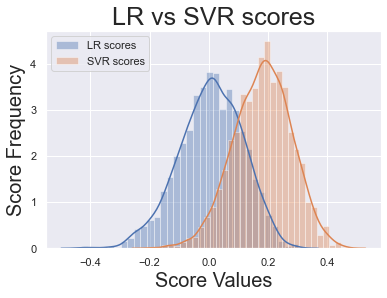

In [6]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)


plot_score_dist(reg1_scores, reg2_scores, 'LR', 'SVR')

In [7]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.2153938161760718
0.2005144534144423
-0.0154669692988314
0.362025555507144


## Linear Regression VS XGBoost

In [8]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.017382
Fold  2 score difference = -0.110241
Fold  1 score difference = -0.154867
Fold  2 score difference = 0.018930
Fold  1 score difference = -0.141872
Fold  2 score difference = -0.085016
Fold  1 score difference = 0.017528
Fold  2 score difference = -0.030216
Fold  1 score difference = -0.135825
Fold  2 score difference = -0.011284
Regression 1 mean score and stdev : 0.044218 + 0.075158
Regression 2 mean score and stdev : 0.105766 + 0.025519
Score difference mean + stdev : -0.061548 + 0.067873
t_value for the current test is 0.211543


mean_score_1 0.006775911732012077, std 0.10706496227560865
mean_score_2 0.22073827209352523, std 0.06922843381016866
Ttest_relResult(statistic=-124.82354678078579, pvalue=0.0)
P value menor ou igual a 0.05


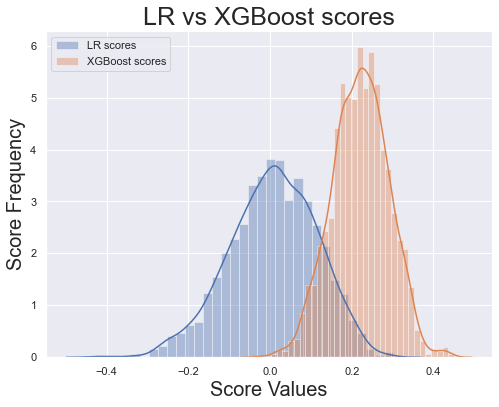

In [9]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'LR', 'XGBoost')

In [10]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.2153938161760718
0.2005144534144423
0.0848947794104637
0.34864607778780565


## SVR VS XGboost

In [11]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.014048
Fold  2 score difference = 0.021870
Fold  1 score difference = -0.042125
Fold  2 score difference = 0.148492
Fold  1 score difference = 0.093141
Fold  2 score difference = 0.019664
Fold  1 score difference = 0.046770
Fold  2 score difference = 0.065839
Fold  1 score difference = 0.036288
Fold  2 score difference = 0.094324
Regression 1 mean score and stdev : 0.155597 + 0.047330
Regression 2 mean score and stdev : 0.105766 + 0.025519
Score difference mean + stdev : 0.049831 + 0.050464
t_value for the current test is 0.208193


mean_score_1 0.18103081143060903, std 0.09701814626671079
mean_score_2 0.22073827209352523, std 0.06922843381016866
Ttest_relResult(statistic=-33.09914742216824, pvalue=2.3028973688910984e-196)
P value menor ou igual a 0.05


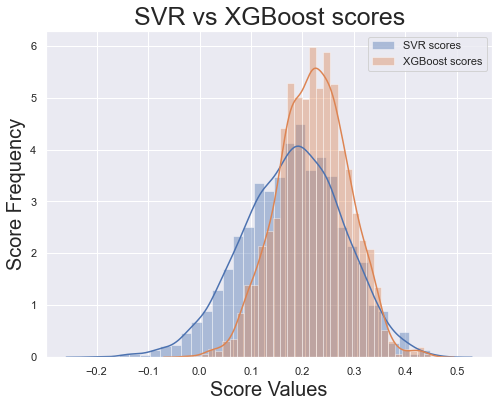

In [12]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [13]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.0154669692988314
0.362025555507144
0.0848947794104637
0.34864607778780565


mean_score_1 -0.6589375871020997, std 0.1965239373094911
mean_score_2 -0.5785045257592695, std 0.14023195566675192
Ttest_relResult(statistic=-33.09914742216824, pvalue=2.3028973688910984e-196)
P value menor ou igual a 0.05


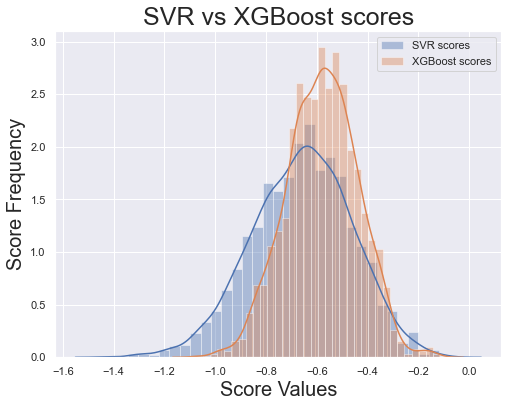

In [14]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    metric="adj_r2",
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [15]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-1.0569715531950687
-0.2923072080752724
-0.8536746776044453
-0.31940922704521424
